<a href="https://www.kaggle.com/code/anshsharmacs22/covidsurvivalspan?scriptVersionId=194549616" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Data Loading

In this section, we load the dataset and explore its structure.

### Importing Necessary Libraries

We start by importing essential libraries for data manipulation and visualization:

**os.walk:** Used to list all files in the input directory.
pandas: To load and manipulate data.

**matplotlib and seaborn**: For creating visualizations.


In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/covid19-dataset/Covid Data.csv


### Loading the Dataset
Next, we load the COVID-19 dataset into a Pandas DataFrame to begin our analysis:

**df.head(10):** Displays the first 10 rows of the dataset to give an initial look at the data.

In [2]:
df = pd.read_csv('/kaggle/input/covid19-dataset/Covid Data.csv')
df.head(10)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


## Exploratory Data Analysis (EDA)

### Distribution of Features

To understand the distribution of different features in the dataset, we use histograms. This helps in identifying the spread and central tendency of the data.


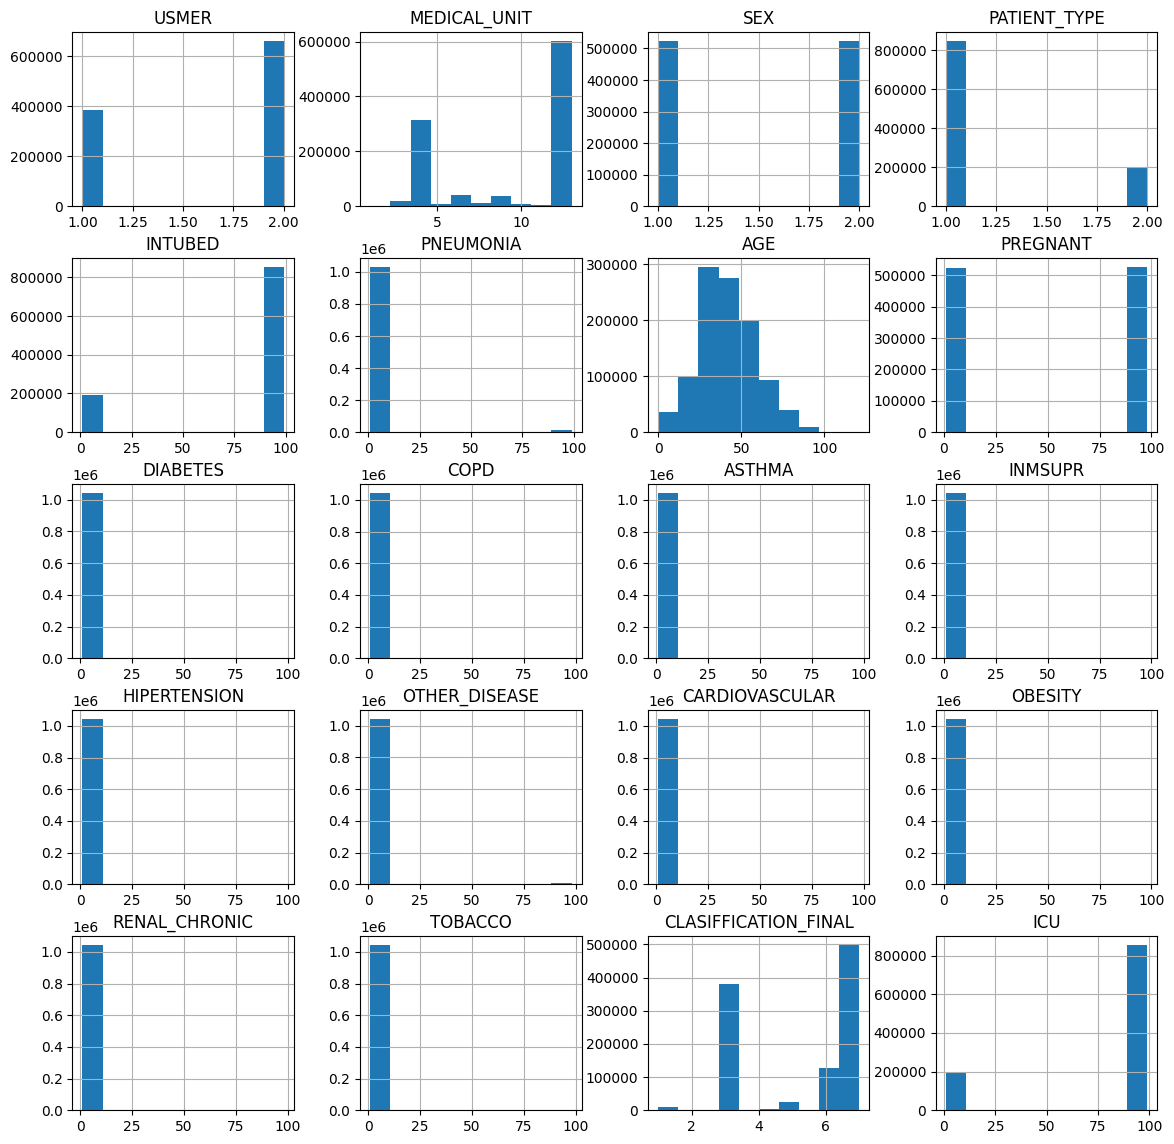

In [3]:
df.hist(bins = 10 , figsize= (14,14))
plt.show()

## Missing Values Analysis

The following table shows the number of missing values for each feature in the dataset:

In [4]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

## Handling Specific Values

In the data preprocessing phase, certain values were identified as erroneous or outliers and were replaced with `NaN`. Specifically, the values 97, 98, and 99 were replaced with `NaN` to handle them appropriately.

## Rationale

**Value Replacement:** The values 97, 98, and 99 were chosen based on domain knowledge or exploratory data analysis, indicating they may be outliers or errors.

**Handling NaN:** Replacing these values with NaN allows us to use standard missing value imputation techniques to handle these cases effectively.

The following code snippet shows how these values were replaced:

In [5]:
for i in [97, 98, 99]:
   df.replace(i , np.nan, inplace = True)

## Date of Death Column Processing

In the data preprocessing phase, the `DATE_DIED` column was processed to handle special cases. Specifically, the value `'9999-99-99'` was replaced with `0`, and all other valid dates were converted to `1`. This transformation allows for binary representation of the presence or absence of death.

The following code snippet illustrates this transformation:

In [6]:
df.DATE_DIED[df['DATE_DIED'] != '9999-99-99'] = 1
df.DATE_DIED[df['DATE_DIED'] == '9999-99-99'] = 0
df.DATE_DIED.value_counts()

/tmp/ipykernel_18/142827724.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.DATE_DIED[df['DATE_DIED'] != '9999-99-99'] = 1
/tmp/ipykernel_18/142827724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

DATE_DIED
0    971633
1     76942
Name: count, dtype: int64

In [7]:
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,1,NaN,1.0,65.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
1,2,1,2,1,1,NaN,1.0,72.0,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,1,2,2,1,1.0,2.0,55.0,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,2,1,1,1,1,NaN,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
4,2,1,2,1,1,NaN,2.0,68.0,NaN,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
5,2,1,1,2,0,2.0,1.0,40.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
6,2,1,1,1,0,NaN,2.0,64.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,NaN
7,2,1,1,1,0,NaN,1.0,64.0,2.0,1.0,...,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,3,NaN
8,2,1,1,2,0,2.0,2.0,37.0,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0
9,2,1,1,2,0,2.0,2.0,25.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0


## Column Renaming and Dropping

In this step, the `DATE_DIED` column was renamed to `DEATH`, and the original `DATE_DIED` column was removed from the dataset. This adjustment simplifies the dataset and aligns with the updated column names.

The following code snippet illustrates these changes:

In [8]:
df['DEATH']=df['DATE_DIED']
df.drop('DATE_DIED',axis=1,inplace=True)
df.head(10)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,NaN,1.0,65.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1
1,2,1,2,1,NaN,1.0,72.0,NaN,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,1
2,2,1,2,2,1.0,2.0,55.0,NaN,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,NaN,2.0,53.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,1
4,2,1,2,1,NaN,2.0,68.0,NaN,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1
5,2,1,1,2,2.0,1.0,40.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,0
6,2,1,1,1,NaN,2.0,64.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,NaN,0
7,2,1,1,1,NaN,1.0,64.0,2.0,1.0,2.0,...,1.0,1.0,2.0,2.0,2.0,1.0,2.0,3,NaN,0
8,2,1,1,2,2.0,2.0,37.0,2.0,1.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,0
9,2,1,1,2,2.0,2.0,25.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,0


## Replacing Categorical Values

In this step, categorical values in the `SEX` and `DEATH` columns were replaced with more descriptive labels to improve clarity.

The following code snippet shows how these replacements were made:

### Updated Columns

### SEX Column:
1 was replaced with 'Female'
2 was replaced with 'Male'


### DEATH Column:
1 was replaced with 'Dead'
0 was replaced with 'Alive'

In [9]:
df['SEX'].replace({1:'Female', 2:'Male'}, inplace = True)
df['DEATH'].replace({1:'Dead', 0:'Alive'}, inplace = True)

/tmp/ipykernel_18/1415960114.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SEX'].replace({1:'Female', 2:'Male'}, inplace = True)
/tmp/ipykernel_18/1415960114.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [10]:
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,Female,1,NaN,1.0,65.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,Dead
1,2,1,Male,1,NaN,1.0,72.0,NaN,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,Dead
2,2,1,Male,2,1.0,2.0,55.0,NaN,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,Dead
3,2,1,Female,1,NaN,2.0,53.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,Dead
4,2,1,Male,1,NaN,2.0,68.0,NaN,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,Dead
5,2,1,Female,2,2.0,1.0,40.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,Alive
6,2,1,Female,1,NaN,2.0,64.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,NaN,Alive
7,2,1,Female,1,NaN,1.0,64.0,2.0,1.0,2.0,...,1.0,1.0,2.0,2.0,2.0,1.0,2.0,3,NaN,Alive
8,2,1,Female,2,2.0,2.0,37.0,2.0,1.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,Alive
9,2,1,Female,2,2.0,2.0,25.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,Alive


## Handling Missing Values in the `PREGNANT` Column

In this step, missing values in the `PREGNANT` column were replaced with `0`. This change ensures that there are no `NaN` values in this column and simplifies further analysis.

The following code snippet demonstrates how missing values were handled:


In [11]:
df['PREGNANT'].replace({np.nan : 0}, inplace = True)
df.head()

/tmp/ipykernel_18/1450373942.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PREGNANT'].replace({np.nan : 0}, inplace = True)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,Female,1,NaN,1.0,65.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,Dead
1,2,1,Male,1,NaN,1.0,72.0,0.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,Dead
2,2,1,Male,2,1.0,2.0,55.0,0.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,Dead
3,2,1,Female,1,NaN,2.0,53.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,Dead
4,2,1,Male,1,NaN,2.0,68.0,0.0,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,Dead


## Grouping and Counting Data

To understand the distribution of the `PREGNANT` column within different categories of `SEX`, the data was grouped by these columns and the counts of each group were computed.

The following code snippet demonstrates how the data was grouped and counted:

In [12]:
df.groupby(['SEX', 'PREGNANT'])['PREGNANT'].count()

SEX     PREGNANT
Female  0.0           3754
        1.0           8131
        2.0         513179
Male    0.0         523511
Name: PREGNANT, dtype: int64

## Replacing Specific Values Across Multiple Columns

In this step, the value `2.0` was replaced with `0` in several columns to standardize the dataset and ensure consistency. This transformation helps in preparing the data for analysis or modeling.

The following code snippet demonstrates the replacements made:

In [13]:
df['USMER'].replace(2.0, 0, inplace=True)
df['SEX'].replace(2.0, 0, inplace=True)
df['PATIENT_TYPE'].replace(2.0, 0, inplace=True)
df['INTUBED'].replace(2.0, 0, inplace=True)
df['PNEUMONIA'].replace(2.0, 0, inplace=True)
df['PREGNANT'].replace(2.0, 0, inplace=True)
df['DIABETES'].replace(2.0, 0, inplace=True)
df['COPD'].replace(2.0, 0, inplace=True)
df['ASTHMA'].replace(2.0, 0, inplace=True)
df['INMSUPR'].replace(2.0, 0, inplace=True)
df['HIPERTENSION'].replace(2.0, 0, inplace=True)
df['OTHER_DISEASE'].replace(2.0, 0, inplace=True)
df['CARDIOVASCULAR'].replace(2.0, 0, inplace=True)
df['OBESITY'].replace(2.0, 0, inplace=True)
df['RENAL_CHRONIC'].replace(2.0, 0, inplace=True)
df['TOBACCO'].replace(2.0, 0, inplace=True)
df['ICU'].replace(2.0, 0, inplace=True)

/tmp/ipykernel_18/1748321029.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['USMER'].replace(2.0, 0, inplace=True)
/tmp/ipykernel_18/1748321029.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [14]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,0,1,Female,1,NaN,1.0,65.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN,Dead
1,0,1,Male,1,NaN,1.0,72.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5,NaN,Dead
2,0,1,Male,0,1.0,0.0,55.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,Dead
3,0,1,Female,1,NaN,0.0,53.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN,Dead
4,0,1,Male,1,NaN,0.0,68.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN,Dead


## Grouping and Counting `PREGNANT` by `SEX`

To analyze the distribution of the `PREGNANT` status within each gender category, the data was grouped by `SEX` and `PREGNANT`, and the count of occurrences was computed.

The following code snippet demonstrates how this grouping and counting was performed:


In [15]:
df.groupby(['SEX', 'PREGNANT'])['PREGNANT'].count()

SEX     PREGNANT
Female  0.0         516933
        1.0           8131
Male    0.0         523511
Name: PREGNANT, dtype: int64

## Value Counts for the `TOBACCO` Column

To understand the distribution of values in the `TOBACCO` column, the counts of each unique value were computed. This helps in analyzing how the `TOBACCO` feature is distributed within the dataset.

The following code snippet demonstrates how to count the unique values in the `TOBACCO` column:

In [16]:
df['TOBACCO'].value_counts()

TOBACCO
0.0    960979
1.0     84376
Name: count, dtype: int64

## Percentage of Missing Values

To assess the proportion of missing values in each column, we calculated the percentage of missing values relative to the total number of rows in the dataset. This helps in identifying columns with significant amounts of missing data.

The following code snippet demonstrates how to compute the percentage of missing values:


In [17]:
print(round((df.isnull().sum() / df.shape[0]) * 100, 2))

USMER                    0.00
MEDICAL_UNIT             0.00
SEX                      0.00
PATIENT_TYPE             0.00
INTUBED                 81.62
PNEUMONIA                1.53
AGE                      0.03
PREGNANT                 0.00
DIABETES                 0.32
COPD                     0.29
ASTHMA                   0.28
INMSUPR                  0.32
HIPERTENSION             0.30
OTHER_DISEASE            0.48
CARDIOVASCULAR           0.29
OBESITY                  0.29
RENAL_CHRONIC            0.29
TOBACCO                  0.31
CLASIFFICATION_FINAL     0.00
ICU                     81.64
DEATH                    0.00
dtype: float64


## Dropping Columns

In this step, the columns `INTUBED` and `ICU` were removed from the dataset. This operation is part of the data preprocessing to refine the dataset by eliminating unnecessary or irrelevant features.

The following code snippet demonstrates how the columns were dropped:

In [18]:
df.drop(columns=["INTUBED","ICU"], inplace=True)

## Imputing Missing Values with Mode

In this step, missing values in several columns were filled with the mode (most frequent value) of each column. This approach is used to impute missing values in categorical columns where the mode represents the most common value.

The following code snippet demonstrates how missing values were filled with the mode:

In [19]:
df.fillna({
    'PNEUMONIA': df['PNEUMONIA'].mode()[0],
    'AGE': df['AGE'].mode()[0],
    'DIABETES': df['DIABETES'].mode()[0],
    'COPD': df['COPD'].mode()[0],
    'INMSUPR': df['INMSUPR'].mode()[0],
    'ASTHMA': df['ASTHMA'].mode()[0],
    'HIPERTENSION': df['HIPERTENSION'].mode()[0],
    'OTHER_DISEASE': df['OTHER_DISEASE'].mode()[0],
    'CARDIOVASCULAR': df['CARDIOVASCULAR'].mode()[0],
    'OBESITY': df['OBESITY'].mode()[0],
    'RENAL_CHRONIC': df['RENAL_CHRONIC'].mode()[0],
    'TOBACCO': df['TOBACCO'].mode()[0]
}, inplace=True)
print(round((df.isnull().sum() / df.shape[0]) * 100, 2))

USMER                   0.0
MEDICAL_UNIT            0.0
SEX                     0.0
PATIENT_TYPE            0.0
PNEUMONIA               0.0
AGE                     0.0
PREGNANT                0.0
DIABETES                0.0
COPD                    0.0
ASTHMA                  0.0
INMSUPR                 0.0
HIPERTENSION            0.0
OTHER_DISEASE           0.0
CARDIOVASCULAR          0.0
OBESITY                 0.0
RENAL_CHRONIC           0.0
TOBACCO                 0.0
CLASIFFICATION_FINAL    0.0
DEATH                   0.0
dtype: float64


## Updating `PATIENT_TYPE` Column

### Examining Value Counts

First, the distribution of unique values in the `PATIENT_TYPE` column was examined to understand its current state. The counts of each unique value are shown below:

In [20]:
df['PATIENT_TYPE'].value_counts()

PATIENT_TYPE
1    848544
0    200031
Name: count, dtype: int64

In [21]:
df['PATIENT_TYPE'].replace({1:'Hospitalized', 0:'Not Hospitalized'}, inplace = True)
df.head()

/tmp/ipykernel_18/1126952520.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PATIENT_TYPE'].replace({1:'Hospitalized', 0:'Not Hospitalized'}, inplace = True)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,0,1,Female,Hospitalized,1.0,65.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,Dead
1,0,1,Male,Hospitalized,1.0,72.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5,Dead
2,0,1,Male,Not Hospitalized,0.0,55.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Dead
3,0,1,Female,Hospitalized,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,Dead
4,0,1,Male,Hospitalized,0.0,68.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,Dead


## Examining Value Counts in the `SEX` Column

To understand the distribution of values in the `SEX` column, we computed the counts of each unique value. This helps in analyzing the gender distribution within the dataset.

The following code snippet demonstrates how to count the occurrences of each value in the `SEX` column:

In [22]:
df['SEX'].value_counts()

SEX
Female    525064
Male      523511
Name: count, dtype: int64

## Visualizing Gender Distribution

A pie chart was created to visualize the distribution of genders within the dataset. This chart provides a clear representation of the proportion of each gender.

The following code snippet demonstrates how to create and display the pie chart:

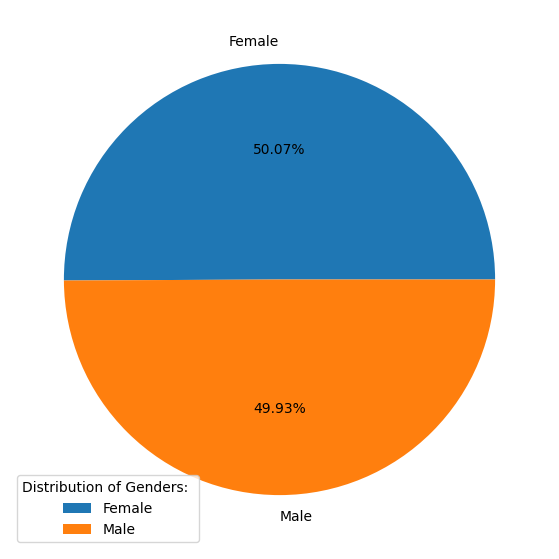

In [23]:
fig = plt.figure(figsize=(10, 7))
plt.pie([525064,523511], labels=['Female','Male'], shadow=False,autopct='%1.2f%%')
plt.legend(title="Distribution of Genders: ")
plt.show()

## Visualizing Patient Type Distribution

A pie chart was created to visualize the distribution of patient types within the dataset. This chart provides a clear representation of the proportion of hospitalized versus not hospitalized patients.

The following code snippet demonstrates how to create and display the pie chart:

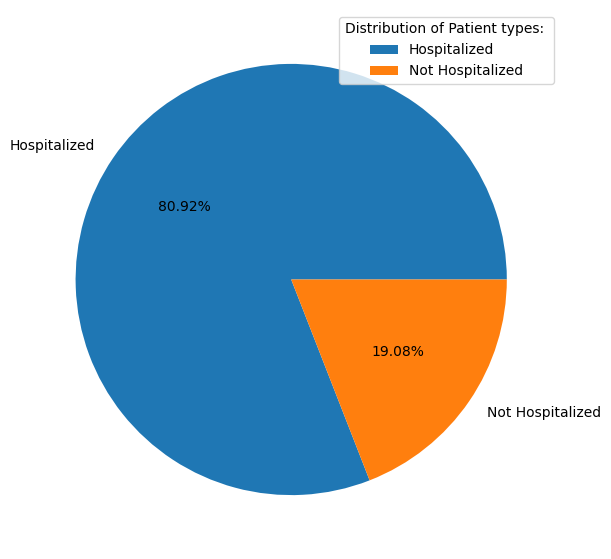

In [24]:
fig = plt.figure(figsize=(10, 7))
plt.pie([848544,200031], labels=['Hospitalized','Not Hospitalized'], shadow=False,autopct='%1.2f%%')
plt.legend(title="Distribution of Patient types: ")
plt.show()

## Updating `CLASIFFICATION_FINAL` Column

### Examining Value Counts

First, the distribution of unique values in the `CLASIFFICATION_FINAL` column was examined to understand its current state. The counts of each unique value are shown below:

In [25]:
df['CLASIFFICATION_FINAL'].value_counts()

CLASIFFICATION_FINAL
7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: count, dtype: int64

### Updating Values

The numeric codes in the CLASIFFICATION_FINAL column were replaced with descriptive labels to enhance readability and understanding. The updated labels provide more context about the classification of patients.

In [26]:
df['CLASIFFICATION_FINAL'].replace([1,2,3,4,5,6,7],['patient was diagnosed with covid in different degrees','patient was diagnosed with covid in different degrees','patient was diagnosed with covid in different degrees','the patient is not a carrier of covid or that the test is inconclusive.','the patient is not a carrier of covid or that the test is inconclusive.','the patient is not a carrier of covid or that the test is inconclusive','the patient is not a carrier of covid or that the test is inconclusive.'],inplace=True)

/tmp/ipykernel_18/2196492894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CLASIFFICATION_FINAL'].replace([1,2,3,4,5,6,7],['patient was diagnosed with covid in different degrees','patient was diagnosed with covid in different degrees','patient was diagnosed with covid in different degrees','the patient is not a carrier of covid or that the test is inconclusive.','the patient is not a carrier of covid or that the test is inconclusive.','the patient is not a carrier of covid or that the test is inconclusive','the patie

## Visualizing Classification Distribution

A pie chart was created to visualize the distribution of classifications within the `CLASIFFICATION_FINAL` column. This chart provides a clear representation of the proportion of each classification.

The following code snippet demonstrates how to create and display the pie chart:

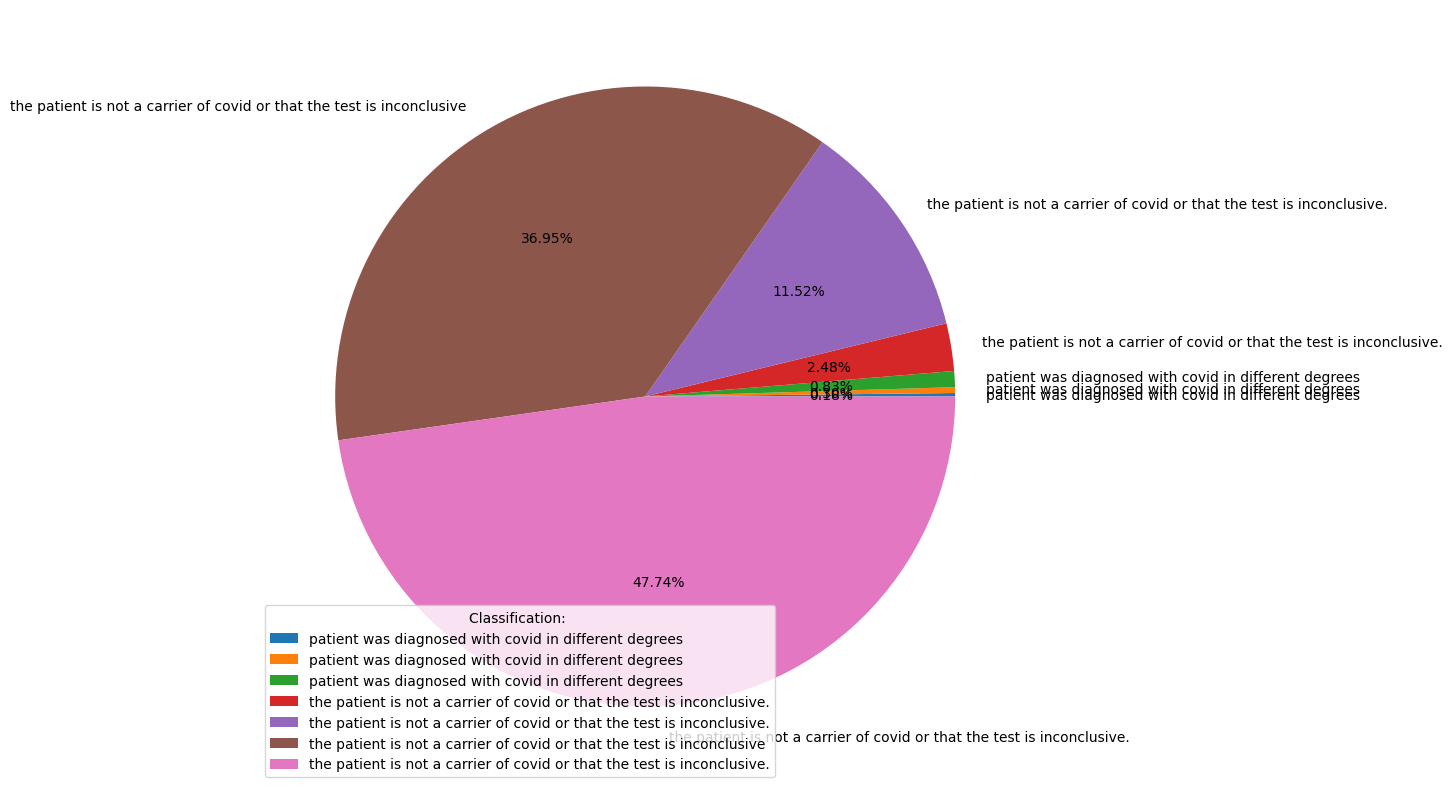

In [27]:
plt.figure(figsize=(10,16))
plt.pie([1851, 3111, 8601, 25612, 118923, 381523, 492951], labels=['patient was diagnosed with covid in different degrees','patient was diagnosed with covid in different degrees','patient was diagnosed with covid in different degrees','the patient is not a carrier of covid or that the test is inconclusive.','the patient is not a carrier of covid or that the test is inconclusive.','the patient is not a carrier of covid or that the test is inconclusive','the patient is not a carrier of covid or that the test is inconclusive.'],shadow=False,autopct='%1.2f%%')
plt.legend(title="Classification: ")
plt.show()

In [28]:
df['DEATH'].value_counts()

DEATH
Alive    971633
Dead      76942
Name: count, dtype: int64

## Visualizing Death Status Distribution

A pie chart was created to visualize the distribution of death status within the dataset. This chart provides a clear representation of the proportion of deceased versus alive patients.

The following code snippet demonstrates how to create and display the pie chart:

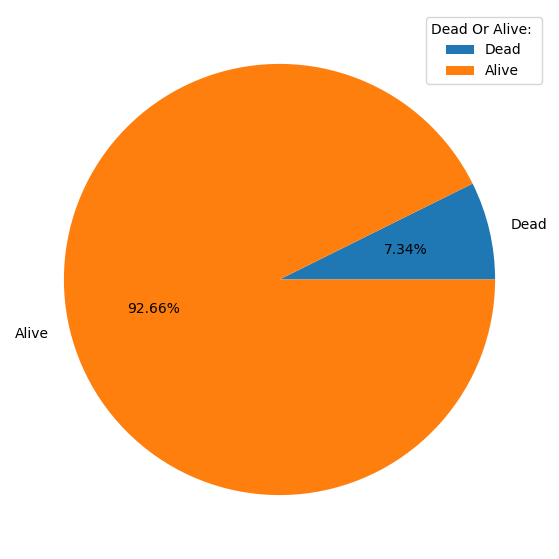

In [29]:
fig = plt.figure(figsize=(10, 7))
plt.pie([76942,971633], labels=['Dead','Alive'], shadow=False,autopct='%1.2f%%')
plt.legend(title="Dead Or Alive: ")
plt.show()

## Visualizing Average Age by Patient Type

A bar plot was created to visualize the average age of patients based on their type of hospitalization. This plot provides insight into the age distribution for different patient types.

<Axes: xlabel='PATIENT_TYPE', ylabel='AGE'>

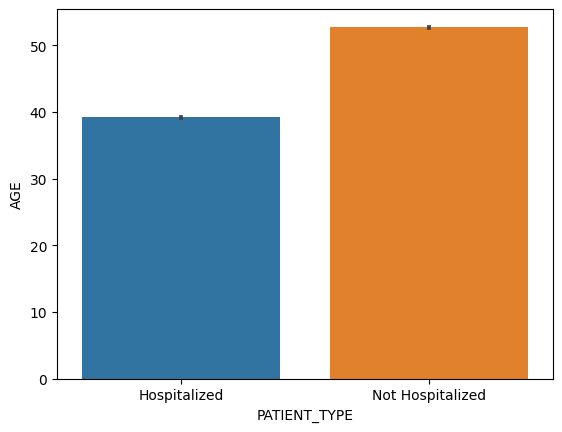

In [30]:
sns.barplot(data=df,x='PATIENT_TYPE',y='AGE')

## Visualizing Average Age by Death Status

A bar plot was created to visualize the average age of patients based on their death status. This plot provides insight into the age distribution for deceased versus alive patients.

<Axes: xlabel='DEATH', ylabel='AGE'>

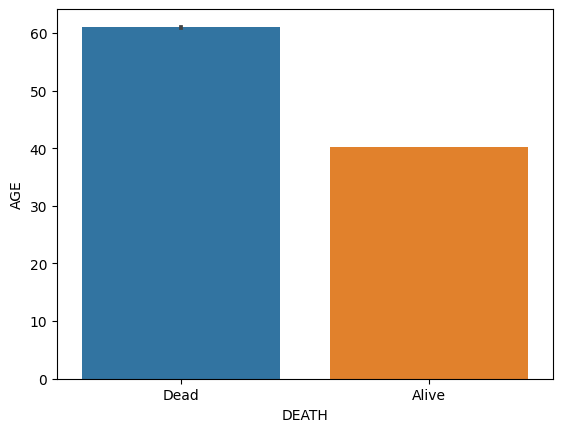

In [31]:
sns.barplot(data=df,x='DEATH',y='AGE')

## Visualizing Hypertension Status by Death Status

A count plot was created to visualize the distribution of hypertension status (`HIPERTENSION`) with respect to death status (`DEATH`). This plot helps to understand how the presence of hypertension correlates with the death status of patients.

### Count Plot
The count plot displays the number of patients for each hypertension status (HIPERTENSION), separated by death status (DEATH).

### Hypertension Status:
0: No Hypertension
1: Hypertension


### Death Status:
Dead
Alive

<Axes: xlabel='HIPERTENSION', ylabel='count'>

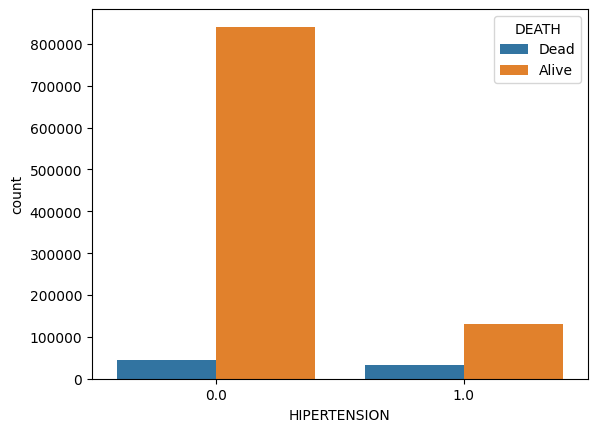

In [32]:
sns.countplot(data=df, x="HIPERTENSION", hue="DEATH")

## Visualizing Diabetes Status by Death Status

### Count Plot
The count plot displays the number of patients for each diabetes status (DIABETES), separated by death status (DEATH).

### Diabetes Status:
0: No Diabetes
1: Diabetes

### Death Status:
Dead
Alive


<Axes: xlabel='DIABETES', ylabel='count'>

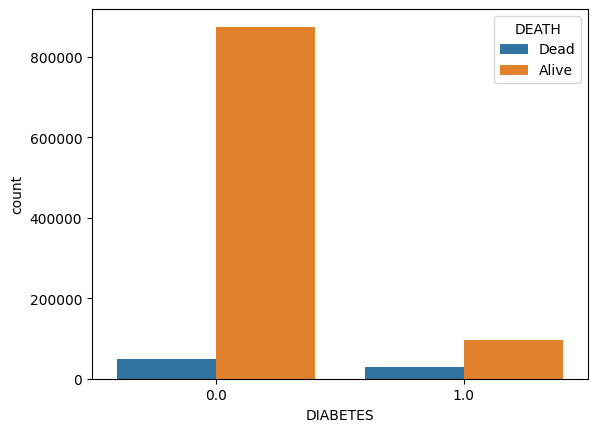

In [33]:
sns.countplot(data=df, x="DIABETES", hue="DEATH")

## Visualizing Sex Distribution by Death Status

A count plot was created to visualize the distribution of sex (`SEX`) with respect to death status (`DEATH`). This plot helps to understand how sex correlates with the death status of patients.

### Count Plot
The count plot displays the number of patients for each sex (SEX), separated by death status (DEATH).

### Sex:
0: Male
1: Female

### Death Status:
Dead

Alive

<Axes: xlabel='SEX', ylabel='count'>

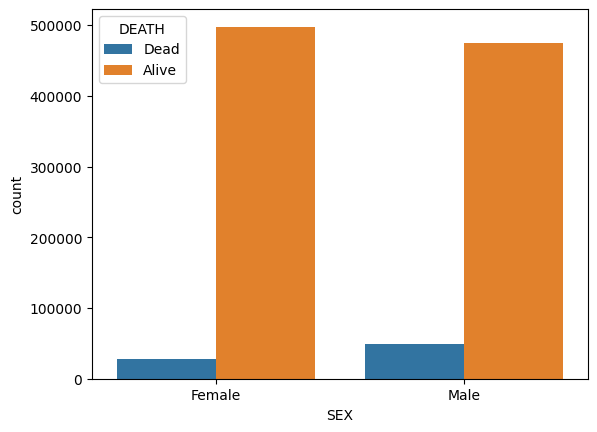

In [34]:
sns.countplot(data=df, x="SEX", hue="DEATH")

## Visualizing Asthma Status by Death Status

A count plot was created to visualize the distribution of asthma status (`ASTHMA`) with respect to death status (`DEATH`). This plot helps to understand how the presence of asthma correlates with the death status of patients.

<Axes: xlabel='ASTHMA', ylabel='count'>

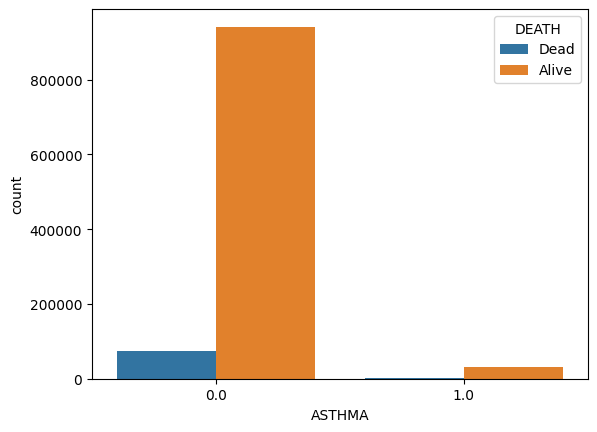

In [35]:
sns.countplot(data=df, x="ASTHMA", hue="DEATH")

## Visualizing Age Distribution by Death Status

A Kernel Density Estimate (KDE) plot was created to visualize the distribution of age (`AGE`) with respect to death status (`DEATH`). This plot provides insight into the age distribution for deceased versus alive patients.

### KDE Plot
The KDE plot displays the density distribution of age, separated by death status (DEATH).

**Age:** The x-axis represents the age of patients.

**Death Status:** Dead, Alive

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

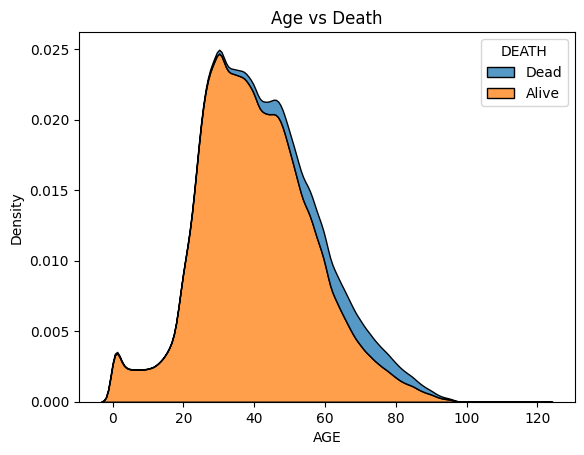

In [36]:
sns.kdeplot(x='AGE', hue='DEATH', data=df, multiple='stack')
plt.title('Age vs Death')
plt.show()

## Encoding Categorical Variables

To prepare the data for machine learning, categorical variables were encoded into numerical values using `LabelEncoder`. This process converts text labels into numerical labels, which are required for many machine learning algorithms.

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
df['SEX'] = le.fit_transform(df['SEX'])
df['PATIENT_TYPE'] = le.fit_transform(df['PATIENT_TYPE'])
df['DEATH'] = le.fit_transform(df['DEATH'])
df['CLASIFFICATION_FINAL'] = le.fit_transform(df['CLASIFFICATION_FINAL'])


## Standardizing Numerical Features

To prepare the data for machine learning, numerical features were standardized using `StandardScaler`. Standardization transforms the data to have a mean of 0 and a standard deviation of 1, which can help improve the performance of many machine learning algorithms

In [39]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df['AGE'] = standard_scaler.fit_transform(df.loc[:,['AGE']])

## Splitting the Dataset

To evaluate the performance of the machine learning model, the dataset was split into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data.

In [40]:
x=df.drop('DEATH', axis=1)
y=df['DEATH']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(y_test)

781974    0
937737    0
907828    0
784628    0
662460    0
         ..
673443    0
656736    0
858501    0
617079    0
487559    0
Name: DEATH, Length: 209715, dtype: int64


## Training and Predicting with Logistic Regression

The logistic regression model was trained on the training set and used to make predictions on the testing set. Logistic regression is a statistical model used for binary classification tasks.

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)



LogisticRegression()

In [42]:
import pickle

# Assuming 'model' is your trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [43]:
y_pred = model.predict(x_test)

## Evaluating the Logistic Regression Model

After training the logistic regression model, its performance was evaluated using various metrics. These metrics provide insights into how well the model performs in terms of accuracy, precision, recall, and F1 score.

The following code snippet demonstrates how to calculate and display these metrics:

In [44]:
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score,confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.937376916291157
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97    194475
           1       0.59      0.44      0.51     15240

    accuracy                           0.94    209715
   macro avg       0.78      0.71      0.74    209715
weighted avg       0.93      0.94      0.93    209715

Precision: 0.5932053437140582
Recall: 0.43996062992125984
F1 Score: 0.5052179482349395


## Confusion Matrix Heatmap

The confusion matrix provides a detailed view of the model's performance by showing the counts of true positives, true negatives, false positives, and false negatives. A heatmap of the confusion matrix was created to visually represent this information.

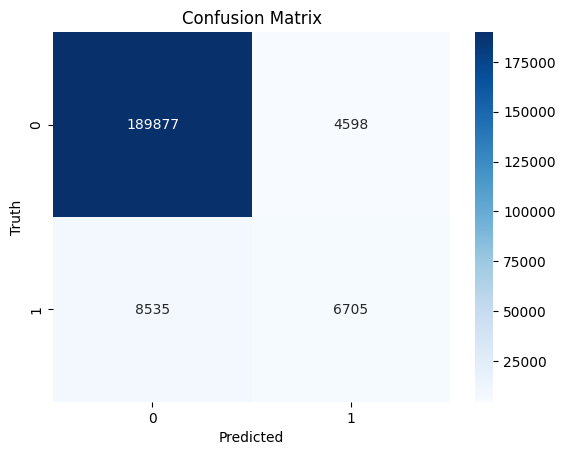

In [45]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Final Conclusion

The model is effective in predicting negative cases and exhibits good overall accuracy. However, it struggles to identify positive cases accurately, resulting in a lower recall and F1 score. This suggests that while the model can be reliable for general predictions, it may not be ideal for applications where detecting positive cases is critical.

### Next Steps

To improve the model, consider the following:

- **Adjust the Decision Threshold**: Fine-tuning the decision threshold may help balance precision and recall.
- **Feature Engineering**: Explore additional features or transformations that could enhance the model's ability to detect positive cases.
- **Model Selection**: Consider alternative algorithms or ensemble methods to improve recall and overall performance.

---

_This analysis provides a comprehensive understanding of the model's strengths and weaknesses, guiding further improvements for better predictive performance._

In [46]:
!ls

__notebook__.ipynb  model.pkl


In [47]:
!ls /kaggle/
!ls /kaggle/working/
!ls /kaggle/input/


input  lib  src  working
__notebook__.ipynb  model.pkl
covid19-dataset


In [48]:
import shutil

# Move the file to /kaggle/working/
shutil.move('model.pkl', '/kaggle/working/model.pkl')


'/kaggle/working/model.pkl'